#### Task:

- To predict salaries for following candidates ,

1. 2 yr experience, 9 test score, 6 interview score

2. 12 yr experience, 10 test score, 10 interview score

3. check the r2_score of your model and explain what it means

In [1]:
import pandas as pd
from sklearn import linear_model
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('hiring.csv')

In [3]:
df.head()

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   experience                  6 non-null      object 
 1   test_score(out of 10)       7 non-null      float64
 2   interview_score(out of 10)  8 non-null      int64  
 3   salary($)                   8 non-null      int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 388.0+ bytes


In [5]:
df2 = df.copy()

In [6]:
df.isna().sum()

experience                    2
test_score(out of 10)         1
interview_score(out of 10)    0
salary($)                     0
dtype: int64

In [7]:
df[df.isna().any(axis=1)]

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
6,ten,NaN,7,72000


In [8]:
df['test_score(out of 10)'] = df['test_score(out of 10)'].fillna(df['test_score(out of 10)'].median())

In [9]:
df[df.isna().any(axis=1)]

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000


In [10]:
# pip install word2number

In [11]:
from word2number import w2n

In [12]:
df.dtypes

experience                     object
test_score(out of 10)         float64
interview_score(out of 10)      int64
salary($)                       int64
dtype: object

In [13]:
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,8.0,7,72000
7,eleven,7.0,8,80000


In [14]:
# convert object to string , then fil missing value with str(zero), then converted back to number to be filled with median values
df['experience'] = df['experience'].astype(str)
df['experience'] = df['experience'].str.replace('nan','zero')

In [15]:
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,8.0,7,72000
7,eleven,7.0,8,80000


In [16]:
df['experience to num']= df['experience'].apply(w2n.word_to_num)

In [17]:
df

,experience,test_score(out of 10),interview_score(out of 10),salary($),experience to num
0,zero,8.0,9,50000,0
1,zero,8.0,6,45000,0
2,five,6.0,7,60000,5
3,two,10.0,10,65000,2
4,seven,9.0,6,70000,7
5,three,7.0,10,62000,3
6,ten,8.0,7,72000,10
7,eleven,7.0,8,80000,11


In [18]:
df['experience to num'] = df['experience to num'].astype(int)

In [19]:
# df['experience to num'] = df['experience to num'].fillna(df['experience to num'].median())
# Code won't work because there is no longer missing value, .replace wil lbe used

In [65]:
print(df['experience to num'].median())
print(" ")
df['experience to num'].mean()

4.0
 


4.75

In [66]:
df['experience to num'] = df['experience to num'].replace(0, 4)

In [67]:
df['experience to num']

0     4
1     4
2     5
3     2
4     7
5     3
6    10
7    11
Name: experience to num, dtype: int32

In [68]:
df

,experience,test_score(out of 10),interview_score(out of 10),salary($),experience to num
0,zero,8.0,9,50000,4
1,zero,8.0,6,45000,4
2,five,6.0,7,60000,5
3,two,10.0,10,65000,2
4,seven,9.0,6,70000,7
5,three,7.0,10,62000,3
6,ten,8.0,7,72000,10
7,eleven,7.0,8,80000,11


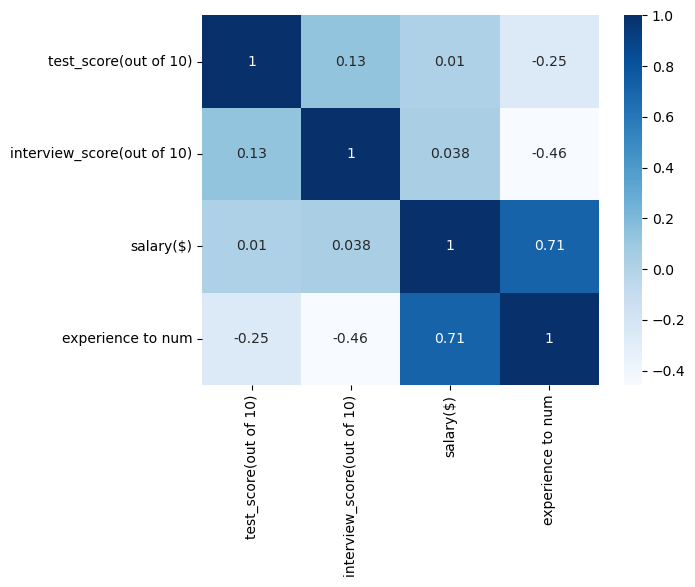

In [69]:
sns.heatmap(df.corr(numeric_only=True), cmap='Blues', annot=True)
plt.show()

In [70]:
independent = df[['test_score(out of 10)', 'interview_score(out of 10)', 'experience to num']]
dependent = df['salary($)']


In [71]:
dependent_ar = (df['salary($)'].values)

#### Model data

In [72]:
model = linear_model.LinearRegression()

# model.fit(df.drop(['experience','salary($)'],axis=1), df['salary($)'])

model.fit(independent, dependent)

LinearRegression()

1. 2 yr experience, 9 test score, 6 interview score

2. 12 yr experience, 10 test score, 10 interview score

3. check the r2_score of your model and explain what it means

#### Predict and test accuracy

In [77]:
from sklearn.metrics import r2_score


prediction1 = model.predict([[9,6,2]])
prediction2 = model.predict([[10,10,12]])

print(prediction1)
print(prediction2)

[46341.80249281]
[94792.77433975]


C:\Users\adesa\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\adesa\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [76]:
# Evaluate model accuracy
# parameters expalined: 1) is the label, 2) is the features being used to predict the label
# Basically, we are saying use the prediction of these features to tell us the accuracy of this model...
# ...which is usually between 0 and 1

r2_score(dependent, model.predict(independent))

0.7075715752205526

### This is a model with 70% accuracy, leaving it room for further improvement